# Valence Arousal Recommender

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from numpy.linalg import norm

## 1. Load Dataset

In [67]:
df = pd.read_csv("valence_arousal_dataset.csv", index_col = 0)
print(df.shape)
df.head()

(11091, 5)


,genre,track_name,artist_name,valence,energy
id,,,,,
7DneDMOlQ1ol2bd2tWukd2,acoustic,Mercy - Radio 1 Live Lounge Session (Duffy cover),OneRepublic,0.815,0.530
2CjMm3TDd9BS8xAcvbe6yY,acoustic,Let Her Go (feat. Hannah Trigwell),Boyce Avenue,0.307,0.333
0O36Yqb2aFcThBphczYoAY,acoustic,A Drop In The Ocean,Ron Pope,0.473,0.452
5GCgC77m6EaAqu7ZlukMu2,acoustic,Umbrella,Train,0.627,0.849
37z3ghNvcoPvHypKWTb2Sz,acoustic,Left for America,Ciaran Lavery,0.250,0.384


In [68]:
df["mood_vec"] = df[["valence", "energy"]].values.tolist()
df["mood_vec"].head()

id
7DneDMOlQ1ol2bd2tWukd2     [0.815, 0.53]
2CjMm3TDd9BS8xAcvbe6yY    [0.307, 0.333]
0O36Yqb2aFcThBphczYoAY    [0.473, 0.452]
5GCgC77m6EaAqu7ZlukMu2    [0.627, 0.849]
37z3ghNvcoPvHypKWTb2Sz     [0.25, 0.384]
Name: mood_vec, dtype: object

## 2. Explorative Data Analysis

### 2.1 Central Tendency and Spread

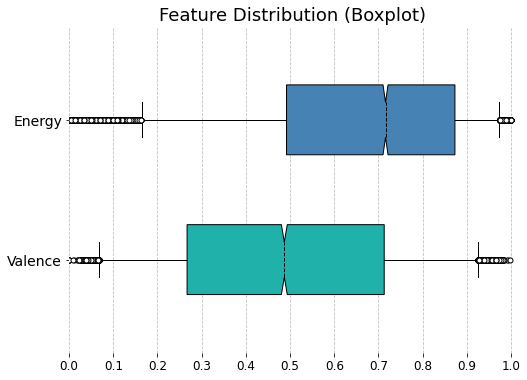

In [69]:
fig, ax = plt.subplots(figsize = (8,6))

# Plot
pos = [.3,.6]
colors = ["lightseagreen", "steelblue"]
bp = ax.boxplot(df[["valence", "energy"]], vert = False, positions = pos, notch = True, whis = [5,95], patch_artist = True,
               flierprops = dict(marker = "o", markersize = 5, markerfacecolor = "white", markeredgecolor = "black"),
               meanline = False, medianprops = dict(linestyle = "--", color = "black"))
for box, c in zip(bp["boxes"], colors):
    box.set_facecolor(c)

# Axes
ax.set_ylim(.1,.8)
ax.set_yticklabels(["Valence", "Energy"], size = 14)
ax.set_xticks(np.arange(0,1.05,.1))
ax.set_xticklabels(np.round(np.arange(0,1.05,.1), 1),size = 12)
ax.set_xlim(0,1.01)

# Labels
ax.set_title("Feature Distribution (Boxplot)", size = 18)

# Cosmetics

ax.xaxis.grid(linestyle = "--", alpha = .8)

for a, spine in ax.spines.items():
    spine.set_visible(False)

plt.show()

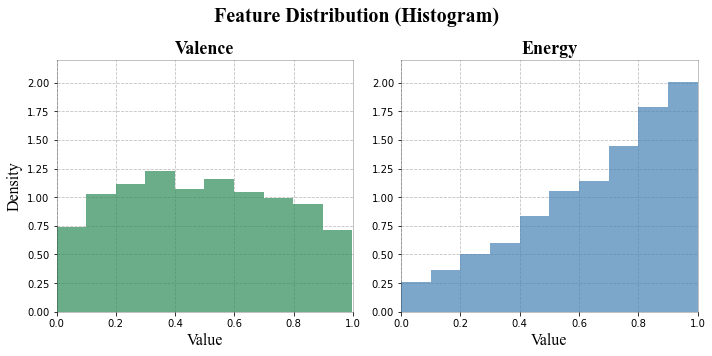

In [70]:
fig, axs = plt.subplots(1,2,figsize = (10,5))

title_font = {"fontname":"Times New Roman", "weight":"bold"}
reg_font = {"fontname":"Times New Roman", "weight":"normal"}

colors = ["seagreen", "steelblue"]
variables = ["valence", "energy"]
    # Plot
for i, (v ,c) in enumerate(zip(variables, colors)):
    axs[i].hist(df[v], color = c, density = True, bins = 10, zorder = 2, alpha = .7)
    
    # Axes
    axs[i].set_xlim(0,1)
    axs[i].set_ylim(0,2.2)

    # Labels
    if i == 0:
        axs[i].set_ylabel("Density", size = 16, **reg_font)
    axs[i].set_title(v.capitalize(), size = 18, **title_font)
    axs[i].set_xlabel("Value", size = 16, **reg_font)

    # Cosmetics
    for a, spine in axs[i].spines.items():
        spine.set_alpha(.3)
        
    plt.suptitle("Feature Distribution (Histogram)", size = 20, **title_font)
    
    axs[i].grid(linestyle = "--", alpha = .8, zorder = 0)

plt.tight_layout()
plt.savefig("figures/distribution_hist.jpg", dpi = 500) 
plt.show()

### 2.2. Correlation

In [80]:
reg[0]

0.24954888301796221

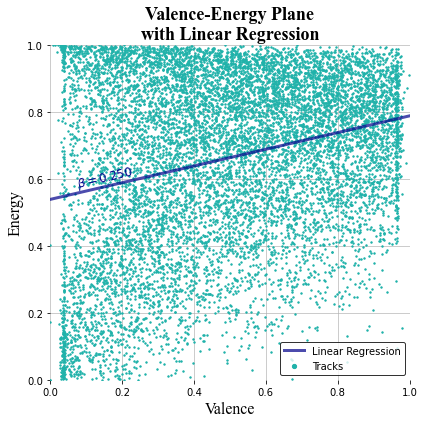

In [77]:
fig, ax = plt.subplots(figsize = (6,6))

title_font = {"fontname":"Times New Roman", "weight":"bold"}
reg_font = {"fontname":"Times New Roman", "weight":"normal"}

# Plot
ax.scatter(df["valence"], df["energy"], s = 2, c = "lightseagreen", label = "Tracks", zorder = 2)
reg = linregress(df["valence"], df["energy"])
x_reg = np.linspace(0,1,100)
ax.plot(x_reg, x_reg*reg[0] + reg[1], linestyle = "-", linewidth = 3, color = "darkblue", alpha = .7, label = "Linear Regression", zorder = 3)

# Axes
ax.set_xlim(0,1)
ax.set_ylim(0,1)

# Labels
ax.set_xlabel("Valence", size = 16, **reg_font)
ax.set_ylabel("Energy", size = 16, **reg_font)
ax.text(.07,.575,"$\\beta = 0.250$", color = "darkblue", **title_font, size = 12, rotation = 13)

# Cosmetics
ax.legend(markerscale = 3, edgecolor = "black")
ax.set_title("Valence-Energy Plane\nwith Linear Regression", size =18, **title_font)

for a, spine in ax.spines.items():
    spine.set_visible(False)
ax.grid(zorder = 0, alpha = .8)

plt.tight_layout()
plt.savefig("figures/valence_arousal_correlation.jpg", dpi = 500)
plt.show()

## 3. Find Similar Tracks

In [316]:
test_id = df.index[100]
test_id, df.loc[test_id, "mood_vec"]

('1NiqejimykCudqSql1KQUi', [0.268, 0.85])

In [324]:
def find_n_similar(df, track_id, n=5):
    input_vec = np.array(df.loc[track_id, "mood_vec"])
    df["distances"] = df["mood_vec"].apply(lambda x: norm(input_vec-np.array(x)))
    df_sorted = df.sort_values(by = "distances", ascending = True)
    return df_sorted[1:n+1]

In [325]:
find_n_similar(df, track_id = test_id, n = 5)

,genre,preview_url,title,album,artist,valence,energy,mood_vec,distances
id,,,,,,,,,
1z3ugFmUKoCzGsI6jdY4Ci,road-trip,https://p.scdn.co/mp3-preview/b56a70770267b00c...,Like a Prayer,Celebration (double disc version),Madonna,0.257,0.842,"[0.257, 0.842]",0.013601
75VJonM927sxlOyE8cR8Qe,comedy,https://p.scdn.co/mp3-preview/3cb844a8bc360ffa...,Romance,Shakespeare,Anthony Jeselnik,0.254,0.848,"[0.254, 0.848]",0.014142
4CcZ0CLDV6ZLmd7IblYhW1,malay,https://p.scdn.co/mp3-preview/7d173f4968479532...,Rasa Yang Tertinggal,Rock In Asia,Various Artists,0.281,0.844,"[0.281, 0.844]",0.014318
3Q211SgoRM8zMmGV35IaIN,breakbeat,https://p.scdn.co/mp3-preview/c51e75771209879a...,Cascade,We Control,Hyper,0.281,0.862,"[0.281, 0.862]",0.017692
0Zbm5CKG9HHT9bwgvFc0qI,alternative,https://p.scdn.co/mp3-preview/40ec5a68a92f04b1...,Decode - Twilight Soundtrack Version,Decode,Paramore,0.277,0.866,"[0.277, 0.866]",0.018358


In [326]:
find_n_similar(df, "4gHHytUVWdfPumbJA9AizA")

,genre,preview_url,title,album,artist,valence,energy,mood_vec,distances
id,,,,,,,,,
1hfe1OTdIY9tJYJ06vnL6G,tango,https://p.scdn.co/mp3-preview/ef5679f6e51a8fb1...,Button Up Your Overcoat (excerpt),Water for Elephants,Various Artists,0.909,0.104,"[0.909, 0.104]",0.062394
5aeDSlEXAGFv5GEUqITsPg,holidays,https://p.scdn.co/mp3-preview/499151bb108b507f...,I Saw Mommy Kissing Santa Claus,Christmas With The Lennon Sisters,The Lennon Sisters,0.851,0.216,"[0.851, 0.216]",0.064351
3SZyzIH61YD58TzEsebx67,classical,https://p.scdn.co/mp3-preview/e1a03b3799043511...,Suite No. 1 For Solo Violin (1927): Fuge: Munter!,Karl Amadeus Hartmann: Works For Solo Violin,Ingolf Turban,0.821,0.124,"[0.821, 0.124]",0.075293
2qcLkeeampKDvqQ6wOgOwb,piano,https://p.scdn.co/mp3-preview/32842e16f785f8bb...,Maple Leaf Rag,The Complete Rags Of Scott Joplin,William Albright,0.830,0.223,"[0.83, 0.223]",0.082807
0VVTsn8VhOWWkz14E62dHp,bossanova,https://p.scdn.co/mp3-preview/d67dafddc5ab69f9...,Teach Me Tonight,The Very Best of Bossa Nova: Laurindo Almeida ...,Laurindo Almeida and The Bossa Nova All Stars,0.911,0.243,"[0.911, 0.243]",0.084770
